# 6. Métricas

In [21]:
from google.colab import files
src = list(files.upload().values())[0]
open('utils.py','wb').write(src)
import utils

Saving utils.py to utils (1).py


In [22]:
import utils
import numpy as np
import matplotlib.pyplot as plt

## Etiquetas de Ejemplo

Clasificación binaria probabilística:

In [3]:
y_true = np.array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0])
y_pred_proba = np.array([.99, .98, .72, .70, .65, .51, .39, .24, .11, .01])

Clasificación binaria determinista:

In [4]:
threshold = 0.5
y_pred = (y_pred_proba >= threshold).astype(int)
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0])

Clasificación multiclase determinista:

In [6]:
y_true2 = ["cat", "ant", "cat", "cat", "ant", "bird"]
y_pred2 = ["ant", "ant", "cat", "cat", "ant", "cat"]

## Precision, Recall y F1

La precision es la cantidad de positivos propuestos por el modelo que fueron correctos:

$$Precision = \frac{|Train \cap Test|}{|Train|} = \frac{TP}{TP + FP}$$

La recall es la cantidad de positivos correctos que fueron encontrados por el modelo:

$$Recall = \frac{|Train \cap Test|}{|Test|} = \frac{TP}{TP + FN}$$

$$F_1 = \frac{2 * Precision * Recall}{Precision + Recall}$$

Para clasificación multiclase, se puede calcular una métrica por clase. Luego, las métricas se pueden promediar para obtener resultados "macro".
Para obtener resultados "micro", se hacen primero cálculos globales para TP, FP, TN, FN y luego se calcula como un problema binario.

Podemos usar sklearn para calcularlas:

In [7]:
y_true, y_pred

(array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0]), array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0]))

In [8]:
from sklearn.metrics import precision_score
precision_score(y_true, y_pred)

0.6666666666666666

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_true, y_pred)

In [10]:
from sklearn.metrics import f1_score
f1_score(y_true, y_pred)

0.7272727272727272

## Reporte de Clasificación

- [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

En clasificación binaria:

In [11]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.67      0.80      0.73         5

    accuracy                           0.70        10
   macro avg       0.71      0.70      0.70        10
weighted avg       0.71      0.70      0.70        10



En clasificación multiclase:

In [12]:
print(classification_report(y_true2, y_pred2))

              precision    recall  f1-score   support

         ant       0.67      1.00      0.80         2
        bird       0.00      0.00      0.00         1
         cat       0.67      0.67      0.67         3

    accuracy                           0.67         6
   macro avg       0.44      0.56      0.49         6
weighted avg       0.56      0.67      0.60         6



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Matrices de Confusión

Usamos [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html):


In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
confusion_matrix(y_true, y_pred)

array([[3, 2],
       [1, 4]])

In [25]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

En multiclase:

In [26]:
cm = confusion_matrix(y_true2, y_pred2)
cm

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

Podemos usar [plot_confusion_matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html) pero requiere el clasificador. Definimos nuestra propia versión:

In [28]:
from utils import plot_confusion_matrix

plot_confusion_matrix(cm, ['ant', 'cat', 'bird'])

ModuleNotFoundError: ignored

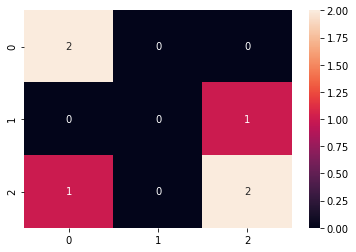

In [30]:
# utilizo esta opción ya que no puedo importar plot_confusion_matrix de utils
import pandas.util.testing as tm
import seaborn as s
s.heatmap(cm, annot=True)


## Curvas ROC

Usamos [roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) para obtener los puntos y graficamos:

In [31]:
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(y_true, y_pred_proba, drop_intermediate=True)

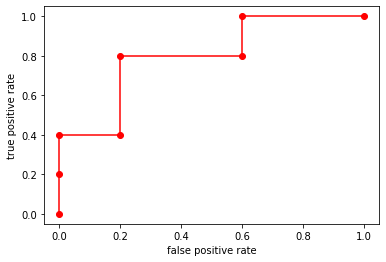

In [32]:
plt.plot(fpr, tpr, color="red")
plt.scatter(fpr, tpr, color="red")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.show()

In [33]:
tpr[4], fpr[4], threshold[4]

(0.8, 0.2, 0.65)

Calculamos el área bajo la curva con [roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html):

In [34]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_true, y_pred_proba)

0.8

## Curvas PR (Precision/Recall)

Usamos [precision_recall_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html) para obtener los puntos y graficamos:

In [35]:
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(y_true, y_pred_proba)

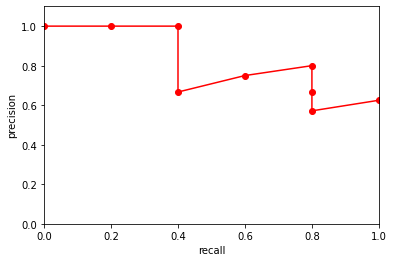

In [36]:
plt.xlim(0, 1)
plt.ylim(0, 1.1)
plt.plot(recall, precision, color="red")
plt.scatter(recall, precision, color="red")
plt.xlabel("recall")
plt.ylabel("precision")
plt.show()

In [37]:
precision[-6], recall[-6], threshold[-6]

(0.8, 0.8, 0.51)

In [38]:
precision[-5], recall[-5], threshold[-5]

(0.75, 0.6, 0.65)

In [39]:
threshold

array([0.24, 0.39, 0.51, 0.65, 0.7 , 0.72, 0.98, 0.99])